# Session 4- Tensorflow Tutorial

## What is Tensorflow

TensorFlow is an open source software library for numerical computation using data flow graphs. We will demonstrate how to define and train neural network models for multi-class classification problems.

In this tutorial, we will train:

- One-Hidden Layer Neural Network Model

## Back to MNIST

The following code will import and download the MNIST dataset.

In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist # 28x28 images of hand-written digits 0-9

(x_train, y_train),(x_test, y_test) = mnist.load_data()

60000 10000
(60000, 28, 28) (60000,)
0 255


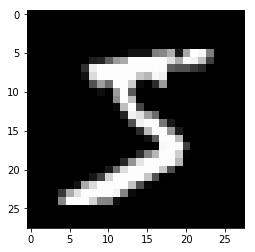

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
# mnist is now a DataSet with accessors for:
#'train' and 'test'
# within each, we can access:
# images, labels, and num_examples
print(len(x_train),
      len(x_test))

# the images are stored as:
# n_observations x 28 x 28
# the labels are stored as n_observations
print(x_train.shape, y_train.shape)

# the range of the values of the images is from 0-255
print(np.min(x_train), np.max(x_train))

# we can visualize any one of the images by reshaping it to a 28x28 image
plt.imshow(x_train[0], cmap='gray')

Logistic regression is a linear model. It solves the same problem that the perceptron algorithm solves - finding a linear seperator for our data.

First, we must normalize the images:

In [3]:
x_train = x_train / 255.0

x_test = x_test / 255.0

Next, let us define our model, it's pretty basic.
<br>
It will contain a single layer with a __Softmax activation function__

In [4]:
#Building the model
model = tf.keras.models.Sequential()    # Creating a Sequential network (FeedForward)
model.add(tf.keras.layers.Flatten())    # Flatting the image from a 28x28 to a 784x1 column
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))   # Creating an output layer with 10 neurones and with an softmax for probability distibution

Recall we need to minimize some loss/cost function.
In our case this function is called cross-entropy (or negative log likelihood for the one-hot case)

This is how to looks like:
$${-}\sum_{i=0}^{n} {y_i} * log(y'_i)$$
where $y_i$ is the true label and $y'_i$ is the model's prediction.

To optimize, we will use a technique called __Stochastic Gradient Descent__

In [5]:
from tensorflow.keras import optimizers
from tensorflow.keras import losses

model.compile(optimizer='sgd',
              loss=losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

## Fitting the model with the training data

We would like to observe the loss function values throught the training process.
<br>
This is why we will create a callback to store the loss and accuracy function values:

In [8]:
class LossAccHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.accuracy = []

    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.accuracy.append(logs.get('acc'))

We will add the callback to the model's fitting

In [9]:
n_epochs = 10
batch_size = 100

history = LossAccHistory()
model.fit(x_train, y_train, validation_split=0.1, shuffle=True, 
          epochs=n_epochs, batch_size=batch_size,
          callbacks=[history])   #Trainning the model with the data

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 4s 71us/step - loss: 1.1945 - acc: 0.7274 - val_loss: 0.7168 - val_acc: 0.8640
Epoch 2/10
54000/54000 [==============================] - 3s 59us/step - loss: 0.6829 - acc: 0.8445 - val_loss: 0.5297 - val_acc: 0.8873
Epoch 3/10
54000/54000 [==============================] - 4s 74us/step - loss: 0.5674 - acc: 0.8611 - val_loss: 0.4557 - val_acc: 0.8957
Epoch 4/10
54000/54000 [==============================] - 3s 63us/step - loss: 0.5113 - acc: 0.8708 - val_loss: 0.4151 - val_acc: 0.8987
Epoch 5/10
54000/54000 [==============================] - 3s 56us/step - loss: 0.4769 - acc: 0.8770 - val_loss: 0.3888 - val_acc: 0.9038
Epoch 6/10
54000/54000 [==============================] - 3s 61us/step - loss: 0.4530 - acc: 0.8814 - val_loss: 0.3696 - val_acc: 0.9088
Epoch 7/10
54000/54000 [==============================] - 3s 59us/step - loss: 0.4352 - acc: 0.8849 - val_loss: 0.3560 - val_acc:

Let us evaluate The accuracy and the loss of the model:

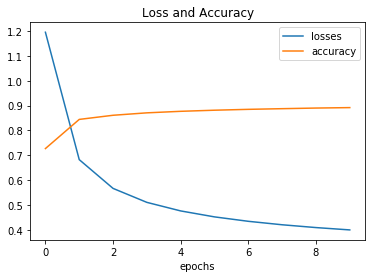

In [10]:
import matplotlib.pyplot as plt
x = range(0, len(history.losses))
plt.plot(x, history.losses)
plt.plot(x, history.accuracy)
plt.xlabel('epochs')
plt.title('Loss and Accuracy')
plt.legend(['losses', 'accuracy'])

## But Wait...

This is our accuracy on the validation set! What we really want to know is how we performed on the test set:

In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 51us/step
Test accuracy: 0.9011


## Adding Layers

So what we have so far is a linear model, basically 1 layer.

Why not add a hidden layer?

Next, we will implement a model called MLP (Multi Layer Perceptron). It will have the following structure:
- Input layer (784)
- Hidden layer (256)
- Output layer (10)

In [12]:
model = tf.keras.models.Sequential()    # Creating a Sequential network (FeedForward)
model.add(tf.keras.layers.Flatten())    # Flatting the image from a 28x28 to a 784x1 column
model.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))   # Creating a fully connected layer With 128 neurons with ReLu activation function
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))   # Creating an output layer with 10 neurones and with an softmax for probability distibution

Let us define the model, this time using a hidden kayer with a relu activation function
- Why use non-linearities? (combining linear function yields a linear function)
- Other options for activation functions? (sigmoid, tanh, etc.)

Now lets use a different optimization technique, instead of using __Stochastic Gradient Descent__ let us use a method called __ADAM__ (it is a varient of SGD, only with different learning rates for each dimension).

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Putting it All Together

In [15]:
class EpochLossAccHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.accuracy = []

    def on_epoch_end(self, epoch, logs={}):
        self.losses.append(logs.get('loss'))
        self.accuracy.append(logs.get('acc'))
        
n_epochs = 10
batch_size = 100

history = EpochLossAccHistory()
model.fit(x_train, y_train, validation_split=0.1, shuffle=True, 
          epochs=n_epochs, batch_size=batch_size,
          callbacks=[history])   #Trainning the model with the data

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 9s 174us/step - loss: 0.3089 - acc: 0.9146 - val_loss: 0.1386 - val_acc: 0.9637
Epoch 2/10
54000/54000 [==============================] - 8s 141us/step - loss: 0.1298 - acc: 0.9629 - val_loss: 0.0995 - val_acc: 0.9722
Epoch 3/10
54000/54000 [==============================] - 8s 139us/step - loss: 0.0876 - acc: 0.9742 - val_loss: 0.0773 - val_acc: 0.9773
Epoch 4/10
54000/54000 [==============================] - 8s 141us/step - loss: 0.0655 - acc: 0.9808 - val_loss: 0.0794 - val_acc: 0.9765
Epoch 5/10
54000/54000 [==============================] - 8s 143us/step - loss: 0.0497 - acc: 0.9854 - val_loss: 0.0720 - val_acc: 0.9795
Epoch 6/10
54000/54000 [==============================] - 8s 141us/step - loss: 0.0386 - acc: 0.9887 - val_loss: 0.0682 - val_acc: 0.9802
Epoch 7/10
54000/54000 [==============================] - 7s 128us/step - loss: 0.0302 - acc: 0.9912 - val_loss: 0.0733 - v

We have an accuracy of 99% on the train data!
<br>
__WOW!__

## Cool. Lets See Some Results

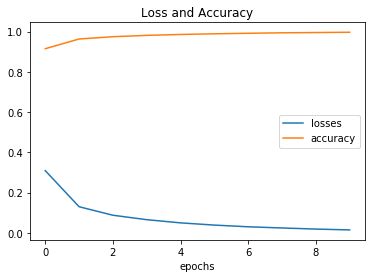

In [16]:
import matplotlib.pyplot as plt
x = range(0, len(history.losses))
plt.plot(x, history.losses)
plt.plot(x, history.accuracy)
plt.xlabel('epochs')
plt.title('Loss and Accuracy')
plt.legend(['losses', 'accuracy'])

## Test Set

In [17]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 26us/step
Test accuracy: 0.9796


This is much better right? 

# Your Turn
Now that you have seen how to build simple models it's your turn to experiment.

Train an MLP.

Follow the instuctions in the following link:

In [ ]:
https://www.tensorflow.org/tutorials/keras/basic_classification